<a href="https://colab.research.google.com/github/salexashenko/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [5]:
import pandas as pd

kc_house_data_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv'

# Load the data into a dataframe
kc_house_df = pd.read_csv(kc_house_data_url)

kc_house_df.head(50)

#kc_house_df.isna().sum()

# There appear to be no missing values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [13]:
#from google.colab import files
#uploaded = files.upload()

bank_df=pd.read_csv('bank-full.csv',sep=";",na_values='unknown')

bank_df.head(50)

#bank_df.isna().sum()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [19]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
bank_additional_df=pd.read_csv('bank-additional/bank-additional-full.csv',sep=";",na_values='unknown')

bank_additional_df.head(20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
bank_additional_df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [26]:
bank_additional_df.fillna(method='bfill', inplace=True)
bank_additional_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

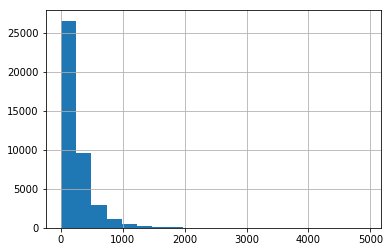

In [27]:
bank_additional_df['duration'].hist(bins=20)

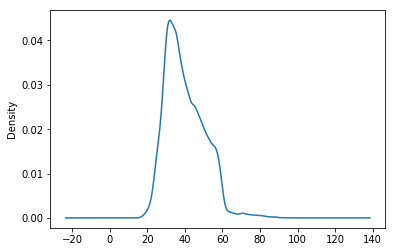

In [30]:
bank_additional_df['age'].plot.density()


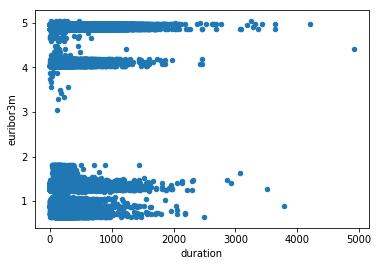

In [32]:
bank_additional_df.plot.scatter('duration','euribor3m')

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
!pip install wbdata



In [35]:
import wbdata
wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [36]:
wbdata.get_indicator(source=75)

AG.LND.AGRI.ZS   	Agricultural land (% of land area)
AG.LND.FRST.ZS   	Forest area (% of land area)
AG.PRD.FOOD.XD   	Food production index (2004-2006 = 100)
CC.EST           	Control of Corruption: Estimate
EG.CFT.ACCS.ZS   	Access to clean fuels and technologies for cooking (% of population)
EG.EGY.PRIM.PP.KD	Energy intensity level of primary energy (MJ/$2011 PPP GDP)
EG.ELC.ACCS.ZS   	Access to electricity (% of population)
EG.ELC.COAL.ZS   	Electricity production from coal sources (% of total)
EG.ELC.RNEW.ZS   	Renewable electricity output (% of total electricity output)
EG.FEC.RNEW.ZS   	Renewable energy consumption (% of total final energy consumption)
EG.IMP.CONS.ZS   	Energy imports, net (% of energy use)
EG.USE.COMM.FO.ZS	Fossil fuel energy consumption (% of total)
EG.USE.PCAP.KG.OE	Energy use (kg of oil equivalent per capita)
EN.ATM.CO2E.PC   	CO2 emissions (metric tons per capita)
EN.ATM.METH.PC   	Methane emissions (kt of CO2 equivalent per capita)
EN.ATM.NOXE.PC   	Nitrous

In [0]:
# Get data
df = wbdata.get_dataframe({"EN.POP.DNST": "Population Density", "EG.ELC.ACCS.ZS": "Electricity Access", "EN.ATM.CO2E.PC": "CO2 Emissions per capita"}).reset_index()

# Remove Aggregates (Europe, Asia, etc)

geos = pd.Series(df.country.unique())
world_index = geos[geos == 'World'].index[0]
aggs = geos[:world_index+1]
df=df[~df.country.isin(aggs)]

df=df.loc[df['date'] == '2010']

In [50]:
# Fill empty values
df.fillna(method='bfill', inplace=True)
df.isna().sum()

country                     0
date                        0
Population Density          0
Electricity Access          0
CO2 Emissions per capita    0
dtype: int64

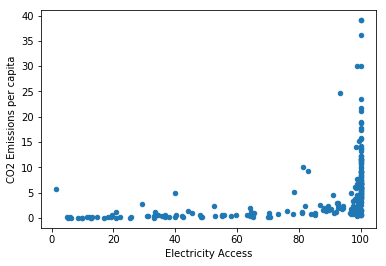

In [51]:
df.plot.scatter('Electricity Access','CO2 Emissions per capita')

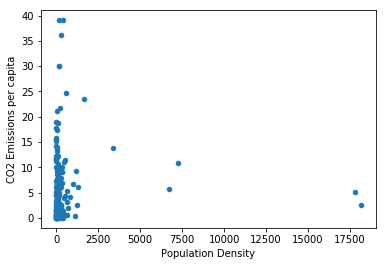

In [52]:
df.plot.scatter('Population Density','CO2 Emissions per capita')

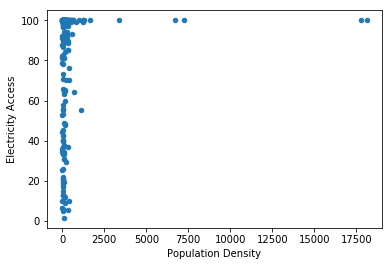

In [53]:
df.plot.scatter('Population Density','Electricity Access')

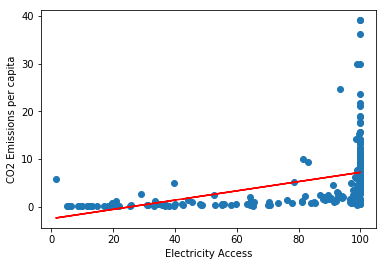

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = df['Electricity Access'].values.reshape(-1, 1)  
Y = df['CO2 Emissions per capita'].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)  


plt.scatter(df['Electricity Access'],df['CO2 Emissions per capita'])
axes = plt.gca()
plt.plot(X, Y_pred, color='red')
plt.xlabel('Electricity Access')
plt.ylabel('CO2 Emissions per capita')
plt.show()
